# HaveYouEverAnalysis

## Write code to perform hyper-paramter tuning using cross validation

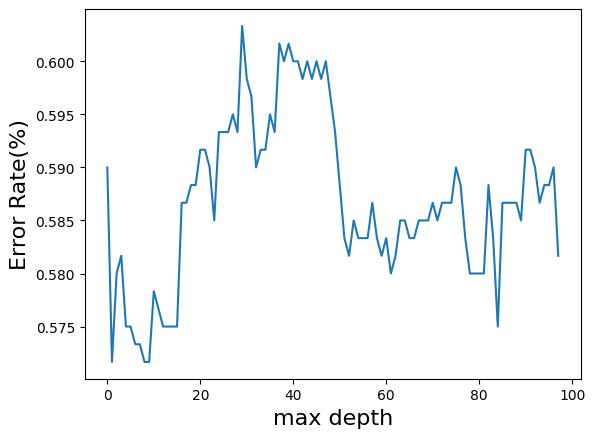

In [2]:
from decision_tree import DecisionTree
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

FOLDS = 10
MAX_DEPTH = 100
kf = KFold(n_splits=FOLDS)

error_rates = np.zeros((FOLDS, MAX_DEPTH - 2)) 


for max_depths in range(2, MAX_DEPTH):
    
    k = 0
    for train_index, val_index in kf.split(X_train):
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train[train_index], y_train[val_index]

        tree = DecisionTree(max_depth=max_depths)
        tree.fit(X_tr, y_tr)
        
        y_val_predict = tree.predict(X_val)
        error_rates[k, max_depths - 2] = np.count_nonzero((y_val != y_val_predict)) / y_val.size
        
        k += 1
        
error_rates_avg = np.mean(error_rates, axis=0)

plt.plot(np.arange(0, MAX_DEPTH - 2), error_rates_avg)
plt.xlabel('max depth', fontsize=16)
plt.ylabel('Error Rate(%)',fontsize=16)
plt.show()

## Short Discussion
the error rates on my model were all above 50% so the model has a better chance of predicting the correct data if the oppsite of is classification is chosin. For this model I chose to go with 10 folds because it is the most widly agreed apon  value to produce results with the lesat bias and variance. The depth that I chose to use for the test data was 10 because it had the lowest error rate and was not that complex of a model. This could lead to there being more bias in the model but since the models error rates on the other depths were so high this was the best option. 

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay
train_tree = DecisionTree(max_depth=10)

train_tree.fit(X_train,y_train)
y_test_predict = train_tree.predict(X_test)

error_rate = np.count_zeros((y_test != y_test_predict)) / y_test.size
print("Classification error rate of test data " + str(error_rate))
ConfusionMatrixDisplay.from_predictions(y_test, y_test_predict)
plt.show()

NameError: name 'DecisionTree' is not defined

## Disccussion
The confusion matrix shows that the model is best at guessing people who are 35+ and people who are 19-24 but failed to put anyone in the 25-34 catigory. 